**Laboratorio de métodos computacionales**

**Universidad de los Andes**

**Profesor: Diego Alberto Castro Rodríguez**

In [4]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

#import plotly.express as px
#import plotly.io as pio
#pio.templates.default = "plotly_dark"

## Regla de euler

Es un algoritmo simple de un solo paso para integrar numéricamente una ecuación diferencial de primer orden. simplemente se sustituye la derivada con la definición de derivada sin hacer tender $h$ a cero y se despeja $y_{n+1}$

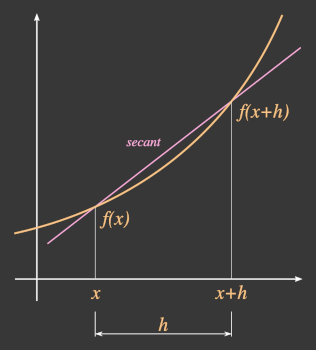

\begin{align}
\frac{dy(t)}{dt} &= f(t, y) \\
\frac{y\left( t_{n+1}\right)-  y\left(t_n\right)  }{h} &\approx f(t, y)\\
y_{n+1} &\approx y_n + hf\left(t_n,y_n\right)
\end{align}
A continuación se implementa este método:

In [5]:
def regla_euler(f, y0, t0, tf, h):
    ys = [y0]
    for t in np.arange(t0, tf, h):
        y1 = y0 + h*f(t, y0)
        ys.append(y1)
        y0 = y1
        
    return np.linspace(t0, tf, len(ys)), np.array(ys)

**EJEMPLO:** Usar el método de Euler con tamaño del paso $h=0.1$ para aproximar la solución del problema con valor inicial

$$\frac{dy}{dt} = t\sqrt{y}, \,\,\,\,\,\,\,\,\,\, y(1) = 4$$

para $t = 1.1$, $1.2$, $1.3$, $1.4$ y $1.5$. Imprima el error comparando los resultados aproximados y la solución analítica $\phi(t) = (t^2 + 7)^2/16$.


t = 1.0    err euler = 0.000000
t = 1.1    err euler = 0.003157
t = 1.1    err euler = 0.006452
t = 1.1    err euler = 0.009895
t = 1.2    err euler = 0.013495
t = 1.2    err euler = 0.017263
t = 1.3    err euler = 0.021207
t = 1.4    err euler = 0.025337
t = 1.4    err euler = 0.029664
t = 1.4    err euler = 0.034198
t = 1.5    err euler = 0.038948


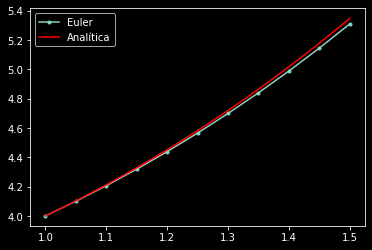

In [8]:
def f(t, y):
    return t*np.sqrt(y)

def sol_analitica(t):
    return (t**2 + 7)**2 / 16

def imprimir_resultados_euler(t,y,f_sol):
  err_euler = np.abs(f_sol(t)-y)
  for i in range(len(t)): 
    print('t = %3.1f    err euler = %f' % (t[i], err_euler[i]))

def grafica_comparativa(t, y_euler, f_sol):
  t_sol = np.linspace(t[0], t[-1], 101)
  plt.plot(t, y_euler, '.-', label = 'Euler')
  plt.plot(t_sol, f_sol(t_sol), 'r', label = 'Analítica')
  plt.legend()

y0 = 4
t0 = 1
tf = 1.5
h = 0.05

t, y_euler = regla_euler(f, y0, t0, tf, h)
imprimir_resultados_euler(t,y_euler,sol_analitica)

grafica_comparativa(t, y_euler, sol_analitica)

## Método de Runge-Kutta de cuarto orden

Se enmarca dentro de un conjunto de métodos genéricos iterativos denominados *métodos de Runge-Kutta* que permiten la resulución numérica de ecuaciones diferenciales.
El método consiste en determinar las constantes adecuadas de forma que 
$$y_{n+1} = y_n +\alpha_1k_1 + \alpha_2k_2 + \cdots + \alpha_mk_m$$

\begin{align}
k_1 &= hf(t_n,\,y_n) \\
k_2 &= hf(t_n+a_2h,\,y_n +b_{21}k_1) \\
k_3 &= hf(t_n+a_3h,\,y_n +b_{31}k_1 + b_{32}k_2) \\
\vdots &\,\,\,\,\,\,\,\,\,\,\,\,\, \vdots \\
k_m &= hf(t_n+a_mh,\,y_n +b_{m1}k_1 + \cdots + b_{m,m-1}k_{m-1})
\end{align}

coincida con el polinomio de Taylor de grado $m$ siguiente:

$$y_{n+1}  = y_{n} + hy'(t_n)+\frac{h^2}{2}y''(t_n)+\cdots+\frac{h^{m}}{m!}y^{[m]}(t_n)$$

Para el caso de cuarto orden ($m=4$), la solución del sistema de ecuaciones resultante es:

$$y_{n+1}=y_n+\frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$

\begin{align}
k_1 &= hf(t_n,y_n) \\
k_2 &= hf\left( t_n + \frac{h}{2},\, y_n + \frac{k_1}{2}\right)\\
k_3 &= hf\left( t_n + \frac{h}{2},\, y_n + \frac{k_2}{2}\right)\\
k_4 &= hf(t_n + h,y_n + k_3)
\end{align}



In [9]:
def runge_kutta_cuarto_orden(f, y0, t0, tf, h):
    ys = [y0]
    for t in np.arange(t0, tf, h):
        k1 = h*f(t, y0)
        k2 = h*f(t+h/2, y0 + k1/2)
        k3 = h*f(t+h/2, y0 + k2/2)
        k4 = h*f(t+h, y0 + k3)
        
        y1 = y0 + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        ys.append(y1)
        y0 = y1
        
    return np.linspace(t0, tf, len(ys)), np.array(ys)

**EJEMPLO**: Usar el método de Runge-Kutta de cuarto orden con tamaño del paso $h=0.5$ para aproximar la solución del problema con valor inicial
$$\frac{dy}{dt} = y\sin^2(t), \,\,\,\,\,\,\,\,\,\, y(0) = 2$$

para $0 \leq t \leq 4$. Imprima los errores  comparando los resultados aproximados y la solución analítica $\phi(t) = 2\exp\left((t- \sin(t)\cos(t))/2\right)$. Compare con el método de Euler.



t = 0.0   err euler = 0.000000   err rk4 = 0.000000
t = 0.5   err euler = 0.080856   err rk4 = 0.000240
t = 1.0   err euler = 0.397099   err rk4 = 0.000397
t = 1.5   err euler = 1.067932   err rk4 = 0.001135
t = 2.0   err euler = 2.047517   err rk4 = 0.002891
t = 2.5   err euler = 2.481220   err rk4 = 0.004281
t = 3.0   err euler = 2.076853   err rk4 = 0.005483
t = 3.5   err euler = 2.155869   err rk4 = 0.006870
t = 4.0   err euler = 3.461592   err rk4 = 0.008667


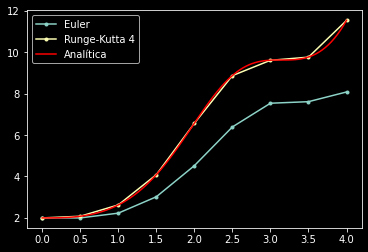

In [10]:
def f(t,y):
  return y*np.sin(t)**2

def sol_analitica(t):
  return 2* np.exp(0.5*(t - np.sin(t)*np.cos(t)))

def grafica_comparativa(t, y_euler, y_rk4, f_sol):
  t_sol = np.linspace(t[0], t[-1], 101)
  plt.plot(t, y_euler, '.-', label = 'Euler')
  plt.plot(t, y_rk4, '.-', label = 'Runge-Kutta 4')
  plt.plot(t_sol, f_sol(t_sol), 'r', label = 'Analítica')
  plt.legend()

def imprimir_error(t, y_euler, y_rk4, f_sol):
  err_euler = np.abs(y_euler - f_sol(t))
  err_rk4 = np.abs(y_rk4 - f_sol(t))
  for i in range(len(t)):
    text = 't = %3.1f   err euler = %f   err rk4 = %f'
    print(text % (t[i],err_euler[i],err_rk4[i]))

y0 = 2.0
t0 = 0.0
tf = 4.0
h = 0.5

t, y_euler = regla_euler(f, y0, t0, tf, h)
t, y_rk4 = runge_kutta_cuarto_orden(f, y0, t0, tf, h)
imprimir_error(t[:], y_euler, y_rk4, sol_analitica)
grafica_comparativa(t, y_euler, y_rk4, sol_analitica)

**EJEMPLO:** Usando el método de Runge-Kutta de cuarto orden determinar la curva a lo largo de la cual un barco se mueve al perseguir a otro que navega a lo largo de una línea recta, suponiendo que las velocidades de los dos barcos son constantes. 

El barco $A$ persigue al barco $B$, de modo que en el instante $t$, el barco $A$ debe apuntar directamente hacia el barco $B$. Es decir, la recta tangente a la curva de persecución en $P$ debe pasar por el punto $Q$ (ver figura). La descripción anterior implica que

$$\frac{dy}{dx}=\frac{y-\beta t}{x-1}$$

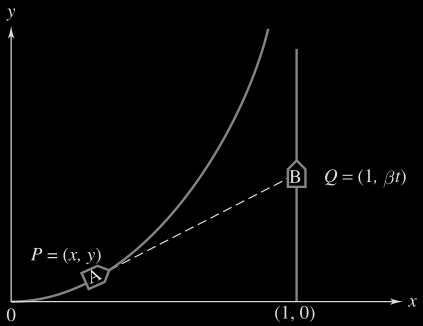

Podemos eliminar la dependencia de $t$ usando la formula de la longitud de arco 

$$\alpha t = \int^x_0\sqrt{1+[y'(u)]^2}du$$

Sustituyendo esta ecuación en la ecuación diferencial a resolver se tiene

$$\frac{y-(x-1)(dy/dx)}{\beta} = \frac{1}{\alpha}\int^x_0\sqrt{1+[y'(u)]^2}du$$
Derivando a ambos extremos respecto a $x$

$$(x-1)\frac{dw}{dx}=\frac{\beta}{\alpha}\sqrt{1+w^2}$$
donde $w:= dy/dx$
Haciendo separación de variables y usando $x=0$ y $dy/dx = 0$ cuando $t=0$ se tiene

$$\frac{dy}{dx} = \frac{1}{2}\left((1-x)^{-\beta / \alpha}-(1-x)^{\beta / \alpha}\right)$$

La solución analítica de esta ecuación es 
$$y =\frac{1}{2}\left( \frac{(1-x)^{1+\beta / \alpha}}{1+\beta / \alpha} - \frac{(1-x)^{1-\beta / \alpha}}{1-\beta / \alpha}\right)+\frac{\alpha\beta}{\alpha^2-\beta^2}$$

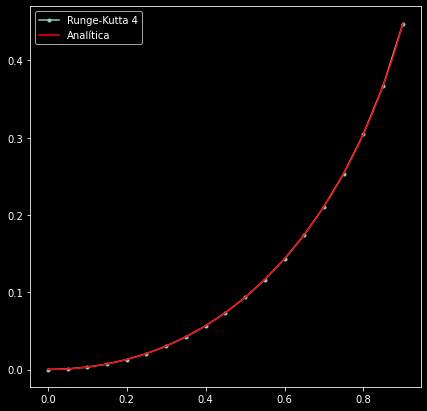

In [11]:
def f(x,y):
  return 0.5*((1-x)**(-beta/alpha) - (1-x)**(beta/alpha))

def sol_analitica(x):
  a = (1-x)**(1+beta/alpha) / (1+beta/alpha)
  b = (1-x)**(1-beta/alpha) / (1-beta/alpha)
  c = alpha*beta/(alpha**2 - beta**2)
  return 0.5*(a-b)+c

def grafica_comparativa(t, y_rk4, f_sol):
  t_sol = np.linspace(t[0], t[-1], 101)
  plt.figure(figsize=(7,7))
  plt.plot(t, y_rk4, '.-', label = 'Runge-Kutta 4')
  plt.plot(t_sol, f_sol(t_sol), 'r', label = 'Analítica')
  plt.legend()
  plt.show()

def imprimir_error(t, y_euler, y_rk4, f_sol):
  err_euler = np.abs(y_euler - f_sol(t))
  err_rk4 = np.abs(y_rk4 - f_sol(t))
  for i in range(len(t)):
    text = 't = %3.1f   err euler = %f   err rk4 = %f'
    print(text % (t[i],err_euler[i],err_rk4[i]))

y0 = 0.0
x0 = 0.0
xf = 0.9
h = 0.05
alpha = 0.5
beta = 0.3

x, y_rk4 = runge_kutta_cuarto_orden(f, y0, x0, xf, h)
grafica_comparativa(x, y_rk4, sol_analitica)
